In [12]:
# sample from the variational posterior distribution
PPC_SAMPLES = 5000
advi_trace = advi_fit.sample(PPC_SAMPLES)

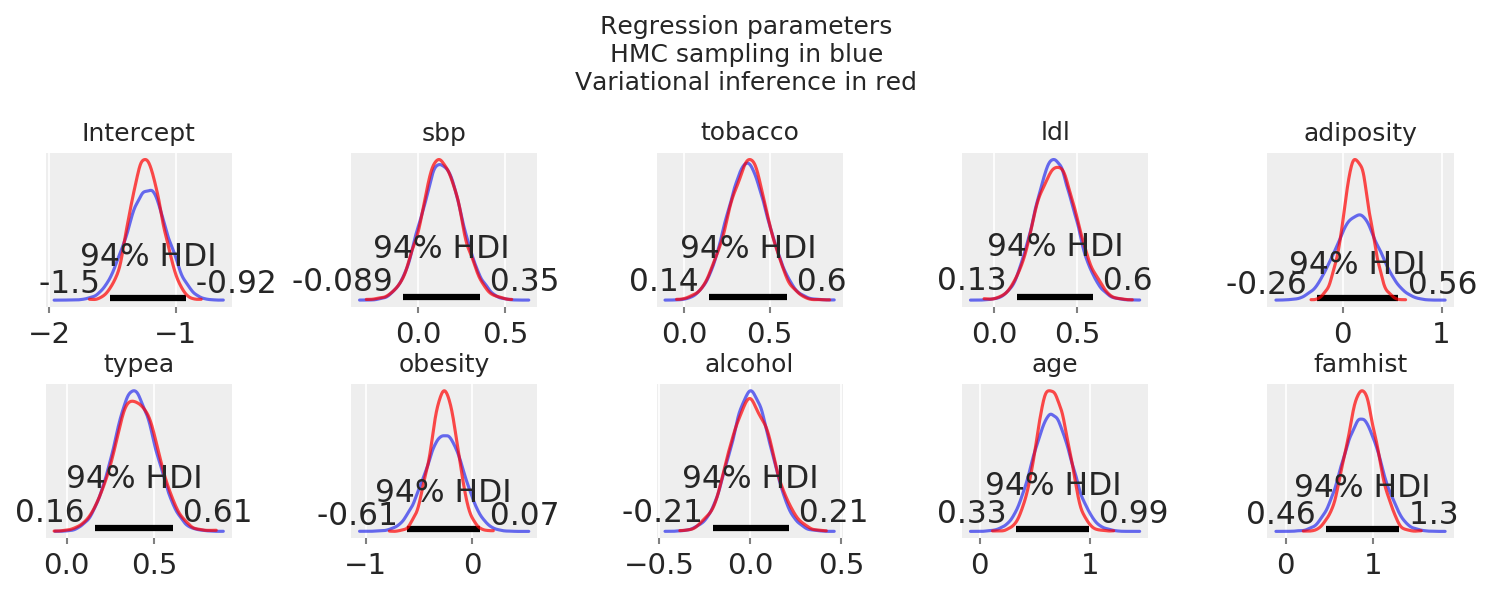

In [24]:
burnin = 100
sample_intercept = trace_main['β0'][burnin:]
sample_betas = trace_main['β'][burnin:]
advi_intercept = advi_trace['β0']
advi_betas = advi_trace['β']

# Plot posteriors

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), dpi=150, constrained_layout=False)

for ax, estimate_sampling, estimate_advi, title, xlabel in zip(axes.ravel(),
                               [sample_intercept] + [sample_betas[:,i] for i in range(k)],
                               [advi_intercept] + [advi_betas[:,i] for i in range(k)],
                               ['Intercept'] + numeric_predictors + ['famhist'],
                               ['Intercept'] + numeric_predictors + ['famhist']):
    
    #pm.plot_posterior(estimate_sampling, ax=ax, point_estimate=None, credible_interval=None, alpha=0.7)
    pm.plot_posterior(estimate_sampling, ax=ax,point_estimate=None,  alpha=0.7)
    pm.plot_posterior(estimate_advi, ax=ax, color='red', point_estimate=None, hdi_prob= 'hide', alpha=0.7)
    
    ax.set_title(title, fontsize=12)

    #ax.set_xlabel(xlabel, fontsize=12)

plt.suptitle("Regression parameters\nHMC sampling in blue\nVariational inference in red")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()